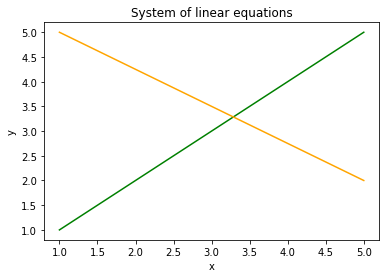

In [6]:
import matplotlib.pyplot as plt

x = [1, 5]
y_1 = [1,5]
y_2 = [5,2]
plt.plot(x, y_1, color='g')
plt.plot(x, y_2, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('System of linear equations')
plt.show()

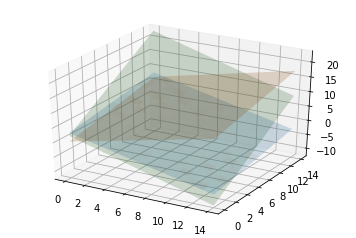

In [6]:
# %matplotlib
# %matplotlib notebook
%matplotlib inline


import numpy as np
import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# plane 1
point_1  = np.array([1, 2, 3])
normal_1 = np.array([-4, 2, -5])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d_1 = -point_1.dot(normal_1)

# create x,y
xx, yy = np.meshgrid(range(15), range(15))

# calculate corresponding z
z_1 = (-normal_1[0] * xx - normal_1[1] * yy - d_1) * 1. /normal_1[2]

# plane 2

point_2  = np.array([4, 2, 4])
normal_2 = np.array([3, 2, -4])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d_2 = -point_2.dot(normal_2)
# calculate corresponding z
z_2 = (-normal_2[0] * xx - normal_2[1] * yy - d_2) * 1. /normal_2[2]


# plane 3

point_3  = np.array([1, 2, 4])
normal_3 = np.array([-4, 6, -4])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d_3 = -point_3.dot(normal_3)
# calculate corresponding z
z_3 = (-normal_3[0] * xx - normal_3[1] * yy - d_3) * 1. /normal_3[2]


# not working, why??
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')


# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z_1, alpha=0.2)
plt3d.plot_surface(xx, yy, z_2, alpha=0.2)
plt3d.plot_surface(xx, yy, z_3, alpha=0.2)

plt.show()

x*(0.00866666666666667*x + 0.546666666666666) + 1.0
x*(-0.0196*x + 1.96) + 1.0
x*(x*(x*(1.46008658008658e-5*x - 0.00333319480519481) + 0.224864069264069) - 3.75532467532468) + 1.0


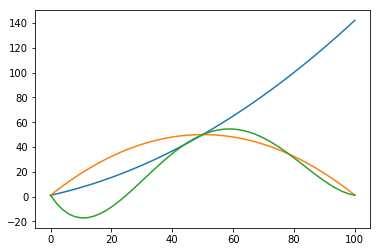

In [78]:
from sympy import *
from sympy.matrices import *
import numpy
import pylab
import warnings

def Lagrange_interpolation(points, variable=None):
    """
    Compute the Lagrange interpolation polynomial.
    
    :var points: A numpy n×2 ndarray of the interpolations points
    :var variable: None, float or ndarray
    :returns:   * P the symbolic expression
                * Y the evaluation of the polynomial if `variable` is float or ndarray
                
    """
    x = Symbol("x")
    L = zeros(1, points.shape[0])
    i = 0

    for p in points:
        numerator = 1
        denominator = 1
        other_points = numpy.delete(points, i, 0)

        for other_p in other_points:
            numerator = numerator * (x - other_p[0])
            denominator = denominator * (p[0] - other_p[0])

        L[i] = numerator / denominator
        i = i+1
        
    # The Horner factorization will reduce chances of issues with floats approximations
    P = horner(L.multiply(points[..., 1])[0])
    Y = None
    
    try: 
        Y = lambdify(x, P, 'numpy')
        Y = Y(variable)
            
    except:
        warnings.warn("No input variable given - polynomial evaluation skipped")
            
    return P,Y

def test_Lagrange(sets):
    for points in sets:
        x = numpy.linspace(0, 100)
        P, Y = Lagrange_interpolation(points, x)
    
        print(P)
        pylab.plot(x, Y)
        

if __name__ == '__main__':

    sets = [numpy.array([ # Linear
                        [0,1],
                        [50, 50],[60,65]
                        ]),
            numpy.array([ # Quadratic
                        [0,1],
                        [50, 50],
                        [100, 1]
                        ]),
            numpy.array([ # Cubic
                        [0,1],
                        [50, 50],
                        [75, 40],
                        [100, 1],[110,10]
                        ])
           ]

    test_Lagrange(sets)

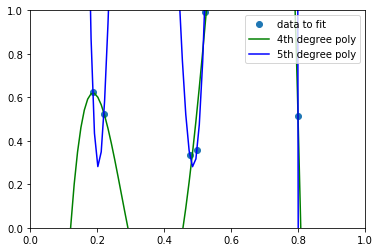

In [79]:
from numpy import *
import pylab

# data to fit
x = random.rand(6)
y = random.rand(6)

# fit the data with a 4th degree polynomial
z4 = polyfit(x, y, 4) 
p4 = poly1d(z4) # construct the polynomial 

z5 = polyfit(x, y, 5)
p5 = poly1d(z5)

xx = linspace(0, 1, 100)
pylab.plot(x, y, 'o', xx, p4(xx),'-g', xx, p5(xx),'-b')
pylab.legend(['data to fit', '4th degree poly', '5th degree poly'])
pylab.axis([0,1,0,1])
pylab.show()

/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


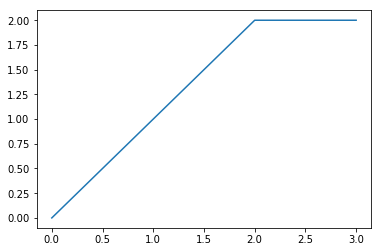

In [3]:
%matplotlib inline
import ipympl
import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

In [5]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

In [1]:
''' Present an interactive function explorer with slider widgets.
Scrub the sliders to change the properties of the ``sin`` curve, or
type into the title text box to update the title of the plot.
Use the ``bokeh serve`` command to run the example by executing:
    bokeh serve sliders.py
at your command prompt. Then navigate to the URL
    http://localhost:5006/sliders
in your browser.
'''
import numpy as np

from bokeh.io import curdoc
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure

# Set up data
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = figure(plot_height=400, plot_width=400, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


# Set up widgets
text = TextInput(title="title", value='my sine wave')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)


# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value

text.on_change('value', update_title)

def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4*np.pi, N)
    y = a*np.sin(k*x + w) + b

    source.data = dict(x=x, y=y)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = widgetbox(text, offset, amplitude, phase, freq)

curdoc().add_root(row(inputs, plot, width=800))
curdoc().title = "Sliders"

In [1]:
import pandas as pd

from bokeh.layouts import row, widgetbox
from bokeh.models import Select
from bokeh.palettes import Spectral5
from bokeh.plotting import curdoc, figure
from bokeh.sampledata.autompg import autompg_clean as df

df = df.copy()

SIZES = list(range(6, 22, 3))
COLORS = Spectral5
N_SIZES = len(SIZES)
N_COLORS = len(COLORS)

# data cleanup
df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)
del df['name']

columns = sorted(df.columns)
discrete = [x for x in columns if df[x].dtype == object]
continuous = [x for x in columns if x not in discrete]

def create_figure():
    xs = df[x.value].values
    ys = df[y.value].values
    x_title = x.value.title()
    y_title = y.value.title()

    kw = dict()
    if x.value in discrete:
        kw['x_range'] = sorted(set(xs))
    if y.value in discrete:
        kw['y_range'] = sorted(set(ys))
    kw['title'] = "%s vs %s" % (x_title, y_title)

    p = figure(plot_height=600, plot_width=800, tools='pan,box_zoom,hover,reset', **kw)
    p.xaxis.axis_label = x_title
    p.yaxis.axis_label = y_title

    if x.value in discrete:
        p.xaxis.major_label_orientation = pd.np.pi / 4

    sz = 9
    if size.value != 'None':
        if len(set(df[size.value])) > N_SIZES:
            groups = pd.qcut(df[size.value].values, N_SIZES, duplicates='drop')
        else:
            groups = pd.Categorical(df[size.value])
        sz = [SIZES[xx] for xx in groups.codes]

    c = "#31AADE"
    if color.value != 'None':
        if len(set(df[color.value])) > N_SIZES:
            groups = pd.qcut(df[color.value].values, N_COLORS, duplicates='drop')
        else:
            groups = pd.Categorical(df[color.value])
        c = [COLORS[xx] for xx in groups.codes]

    p.circle(x=xs, y=ys, color=c, size=sz, line_color="white", alpha=0.6, hover_color='white', hover_alpha=0.5)

    return p


def update(attr, old, new):
    layout.children[1] = create_figure()


x = Select(title='X-Axis', value='mpg', options=columns)
x.on_change('value', update)

y = Select(title='Y-Axis', value='hp', options=columns)
y.on_change('value', update)

size = Select(title='Size', value='None', options=['None'] + continuous)
size.on_change('value', update)

color = Select(title='Color', value='None', options=['None'] + continuous)
color.on_change('value', update)

controls = widgetbox([x, y, color, size], width=200)
layout = row(controls, create_figure())

curdoc().add_root(layout)
curdoc().title = "Crossfilter"

In [3]:
# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>
# Copyright (c) 2008-2015, Enthought, Inc.
# License: BSD Style.

# The pdb code for the protein.
protein_code = '2q09'

# Retrieve the file from the protein database #################################
import os
if not os.path.exists('pdb%s.ent.gz' % protein_code):
    # Download the data
    try:
        from urllib import urlopen
    except ImportError:
        from urllib.request import urlopen
    print('Downloading protein data, please wait')
    opener = urlopen(
      'ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/q0/pdb%s.ent.gz'
      % protein_code)
    open('pdb%s.ent.gz' % protein_code, 'wb').write(opener.read())

# Parse the pdb file ##########################################################
import gzip
infile = gzip.GzipFile('pdb%s.ent.gz' % protein_code, 'rb')

# A graph represented by a dictionary associating nodes with keys
# (numbers), and edges (pairs of node keys).
nodes = dict()
edges = list()
atoms = set()

# Build the graph from the PDB information
last_atom_label = None
last_chain_label = None
for line in infile:
    line = line.split()
    if line[0] in ('ATOM', 'HETATM'):
        nodes[line[1]] = (line[2], line[6], line[7], line[8])
        atoms.add(line[2])
        chain_label = line[5]
        if chain_label == last_chain_label:
            edges.append((line[1], last_atom_label))
        last_atom_label = line[1]
        last_chain_label = chain_label
    elif line[0] == 'CONECT':
        for start, stop in zip(line[1:-1], line[2:]):
            edges.append((start, stop))

atoms = list(atoms)
atoms.sort()
atoms = dict(zip(atoms, range(len(atoms))))

# Turn the graph into 3D positions, and a connection list.
labels = dict()

x = list()
y = list()
z = list()
scalars = list()

for index, label in enumerate(nodes):
    labels[label] = index
    this_scalar, this_x, this_y, this_z = nodes[label]
    scalars.append(atoms[this_scalar])
    x.append(float(this_x))
    y.append(float(this_y))
    z.append(float(this_z))

connections = list()

for start, stop in edges:
    connections.append((labels[start], labels[stop]))

import numpy as np
x = np.array(x)
y = np.array(y)
z = np.array(z)
scalars = np.array(scalars)

# Visualize the data ##########################################################
from mayavi import mlab
mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(x, y, z, 1.5 * scalars.max() - scalars,
                                    scale_factor=0.015, resolution=10)
pts.mlab_source.dataset.lines = np.array(connections)

# Use a tube fiter to plot tubes on the link, varying the radius with the
# scalar value
tube = mlab.pipeline.tube(pts, tube_radius=0.15)
tube.filter.radius_factor = 1.
tube.filter.vary_radius = 'vary_radius_by_scalar'
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0))

# Visualize the local atomic density
mlab.pipeline.volume(mlab.pipeline.gaussian_splatter(pts))

mlab.view(49, 31.5, 52.8, (4.2, 37.3, 20.6))

mlab.show()

RuntimeError: No traitsui.toolkits plugin found for toolkit null